## Python Notebook to interact with gym-battery and battery-agent

This python notebook is a working document to interact with and test the environment and the agent.

Note: In order for this to work, gym-battery needs to be installed as a package, using pip install -e gym-battery from wherever gym-battery exists.

The ipython notebook should exist in battery dispatch by default and should be ableto access those resources so it does not necessarily need to be build/installed using pip.

In [1]:
import gym
import gym_battery 
import numpy as np
import pandas as pd

In [2]:
env = gym.make('gym_battery:battery-v0', **{'N_actions':5})
env.set_standard_system()

setting the standard system, A10S Med busines large usage with a 2,000kW/10,000kWh battery


In [3]:
# Show the possible action mapping the agent can take
env.action_mapping

{0: -1000.0, 1: -500.0, 2: 0.0, 3: 500.0, 4: 1000.0}

In [4]:
print(env.observation_space.low)
print("to")
print(env.observation_space.high)

[  0.   0. 300. 300.]
to
[   24. 10000. 16200. 17200.]


In [5]:
# Set how to structure the environment. 'count_days' will generate the a single day as an episode. THe number of days
# given indicates how many differnet days to use.
# This needs to be changed so that it generates LONGER episodes, not DIFFERENT episodes, but this hasn't been done yet.
env.episode_type = 'count_days'
env.run_N_episodes = 1
env.load.DF = env.load.DF[76:76*4]
env.fit_load_to_space()

In [6]:
env.load.DF['value'][76] = 4500
env.load.DF

,duration,start,value,duration_hrs
76,900,2011-03-07 00:00:00,4500.0,0.25
77,900,2011-03-07 00:15:00,4500.0,0.25
78,900,2011-03-07 00:30:00,4800.0,0.25
79,900,2011-03-07 00:45:00,4500.0,0.25
80,900,2011-03-07 01:00:00,4500.0,0.25
81,900,2011-03-07 01:15:00,4800.0,0.25
82,900,2011-03-07 01:30:00,4500.0,0.25
83,900,2011-03-07 01:45:00,4200.0,0.25
84,900,2011-03-07 02:00:00,4200.0,0.25
85,900,2011-03-07 02:15:00,4200.0,0.25


In [7]:
# Get the do-nothing value for taking no action
def dict_key_by_val(d, val):
    for k in d.keys():
        if d[k] == val:
            return k
    raise ValueError("value not found in dictionary")
    
act0 = dict_key_by_val(env.action_mapping, 0)
act0

2

In [8]:
''' Set up the agent and the discretizer.'''
from batterydispatch.agent.agents import DynaQAgent
from batterydispatch.agent.discretizers import Box_Discretizer

from batterydispatch.agent.policies import do_nothing
agent = DynaQAgent()
agent.set_policy(do_nothing, {'do_nothing_action': act0})

# Note, you can change the size of the state sapce by changing the number of buckets, below
agent.set_discretizer(Box_Discretizer(env.observation_space, N=[6, 4, 12, 12]))
agent.actions = env.action_space
agent.learning_rate = 0.05 # used for the updates of the Q estimates
agent.subtype = 'on-policy' # Setup the MC agent for off-policy learning

global eps
eps=0

remember to set self.actions = env.action_space!


In [9]:
agent.discretizer.buckets


[array([ 4.,  8., 12., 16., 20., 24.]),
 array([ 2500.25,  5000.5 ,  7500.75, 10001.  ]),
 array([1575.08333333, 1950.16666667, 2325.25      , 2700.33333333,
        3075.41666667, 3450.5       , 3825.58333333, 4200.66666667,
        4575.75      , 4950.83333333, 5325.91666667, 5701.        ]),
 array([1658.41666667, 2116.83333333, 2575.25      , 3033.66666667,
        3492.08333333, 3950.5       , 4408.91666667, 4867.33333333,
        5325.75      , 5784.16666667, 6242.58333333, 6701.        ])]

## Plot the day of data that we will be trying to learn from

c:\users\administrator\pycharmprojects\gym-battery\gym_battery\envs\battery_env.py:154: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  self.grid_flow.set_value(self.step_ix, 'state', tuple(self.state))


2011-03-07
96
-436363.38749999995


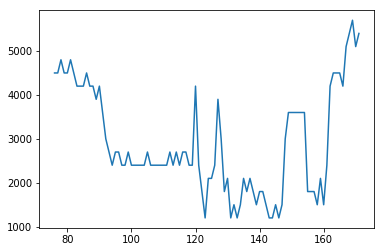

In [10]:

done = False
state = env.reset()
i = 0
while not done:
    i+=1
    action = agent.get_action(state, env.action_space, 0)
    _,reward,done, details = env.step(action)

from matplotlib import pyplot as plt
plt.plot(env.grid_flow.net_flow)
try:
    print(list(env.grid_flow.start_date)[0])
except:
    pass
print(i)
print(reward)
default_reward = reward
plt.show()


In [25]:
# We then initialize the agent state-action estimates, based on the original billing period.
# We also give the do_nothing action a small bonus of 100, in order to prevent the agent from arbitrarily taking action.
agent.initialize_state_actions(new_default=default_reward)
history=[]


In [59]:
import sqlite3

def save_results(scenario=None, agent_name=None, notes=None):
    
    
    conn = sqlite3.connect('gym_battery_database.db')
    
    
    result = conn.execute('SELECT MAX(id) FROM grid_flow_output;')
    scenario_id = result.fetchone() + 1
    
    if scenario is None:
        scenario = input("Enter the scenario name (i.e. the load used): ")
    if agent is None:
        scenario = input("Enter the agent name, or y to accept {}: ".format(agent.name))
        if scenario.lower() == 'y':
            scenario = agent.name
    if notes is None:
        notes = input("Consider adding any notes: ")
    
    saved_time = pd.Timestamp.now()
    
    # Save the final grid_flow using entirely greedy policy
    DF = env.grid_flow.copy()
    
    DF['agent_state'] = [tuple(agent.discretize_space(np.array(s))) for s in DF.state]
    agent_state_hash_table = {hash(s):s for s in DF.agent_state}
    DF.agent_state = [hash(s) for s in DF.agent_state]
    
    state_hash_table = {hash(s):s for s in DF.state}
    DF.state = [hash(s) for s in DF.state]
    
    DF['reward'] = reward
    DF['agent'] = agent_name
    DF['scenario'] = scenario
    DF['episodes'] = len(history)
    DF['notes'] = notes
    DF['scenario_id'] = scenario_id
    DF['saved_timestamp'] = saved_time
    
    DF.to_sql('grid_flow_output', conn, if_exists='append')

    # Save the state-action value estimates
    val = agent.S_A_values.copy()
    val = pd.DataFrame.from_dict(val, orient='index')
    val = val.reset_index()
    val['state'] = [[i.level_0, i.level_1, i.level_2, i.level_3] for ix, i in val.iterrows()]
    val = val.rename(columns={"state": "agent_state"})
    val.index = val.agent_state
    val = val.drop(columns=['level_0', 'level_1', 'level_2', 'level_3', 'agent_state'])
    val.index = [tuple(x) for x in val.index]
    
    add_agent_state_hash = {hash(s):s for s in val.index if hash(s) not in agent_state_hash_table.keys()}
    agent_state_hash_table.update(add_agent_state_hash)
    
    val.index = [hash(s) for s in val.index]
    val['agent'] = agent_name
    val['scenario'] = scenario
    va['scenario_id'] = scenario_id
    val['saved_timestamp'] = saved_time
    val.to_sql('state_action_values', conn, if_exists='append')
    
    
    agent_state_hash_DF = pd.DataFrame.from_dict(agent_state_hash_table, orient='index', columns=['hour', 'charge', 'load', 'demand'])
    agent_state_hash_DF['saved_timestamp'] = saved_time
    agent_state_hash_DF['state'] = agent_state_hash_DF.index
    try:
        agent_state_hash_DF = pd.read_sql('SELECT * FROM agent_states_hash;', conn).append(agent_state_hash_DF)
    except:
        print("Error reading in agent state hash table. Is this the first time you're running it?")
    agent_state_hash_DF.drop_duplicates(subset='state', inplace=True)
    agent_state_hash_DF.reset_index(drop=True, inplace=True)
    agent_state_hash_DF.saved_timestamp = pd.to_datetime(agent_state_hash_DF.saved_timestamp)
#    conn.execute("DROP TABLE agent_states_hash;")
    try:
        agent_state_hash_DF.to_sql('agent_states_hash', conn, if_exists='replace', index=False)    
    except:
        print("returnign DF")
        return agent_state_hash_DF

    state_hash_DF = pd.DataFrame.from_dict(state_hash_table, orient='index', columns=['hour', 'charge', 'load', 'demand'])
    state_hash_DF['saved_timestamp'] = saved_time
    state_hash_DF['state'] = state_hash_DF.index
    try:
        state_hash_DF = pd.read_sql('SELECT * FROM states_hash;', conn).append(state_hash_DF)
    except:
        print("Error reading in state hash table. Is this the first time you're running it?")
    state_hash_DF.drop_duplicates(subset='state', inplace=True)
    state_hash_DF.reset_index(drop=True, inplace=True)
    state_hash_DF.saved_timestamp = pd.to_datetime(state_hash_DF.saved_timestamp)
    state_hash_DF.to_sql('states_hash', conn, if_exists='replace', index=False)
    
    # Save the history of performance by episode
    df_history = pd.DataFrame(history, columns=['episode_cnt', 'reward', 'new_demand', 'orig_reward', 'orig_demand'])
    df_history['saved_timestamp'] =saved_time
    df_history['agent'] = agent_name
    df_history['scenario'] = scenario
    df_history['scenario_id'] = scenario_id
    df_history.to_sql('history', conn, if_exists='append')
    
    conn.close()

In [60]:
DF = save_results(scenario='Day1_load', agent_name='Do_Nothing', notes="Do nothing to baseline day1)")

scenario_id = 13


In [129]:
conn = sqlite3.connect('gym_battery_database.db')

In [130]:
conn.execute('DELETE FROM grid_flow_output where scenario_id > 8 and scenario_id < 13;')

In [131]:
DF_dumb = pd.read_sql('SELECT * FROM grid_flow_output', conn)

In [132]:
list(set(DF_dumb.scenario_id))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 13]

In [133]:
list(set(DF_dumb.scenario_id))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 13]

In [134]:
DF_dumb['start'] = pd.to_datetime(DF_dumb['start'])
DF_dumb.drop(columns='level_0', inplace=True)

In [83]:
DF_dumb.to_sql('grid_flow_output', conn, if_exists='replace')

In [135]:
list(set(DF_dumb[DF_dumb.scenario_id==3].reward))

[-410572.25875]

In [136]:
env.grid_flow = DF_dumb[DF_dumb.scenario_id==3]
env.grid_flow['start'] = pd.to_datetime(DF_dumb['start'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [137]:
env.grid_flow

,index,duration,start,value,duration_hrs,start_date,net_flow,load,battery_action,state_of_charge,state,reward,agent,scenario,episodes,agent_state,notes,saved_timestamp,scenario_id
288,0,900,2011-03-07 00:00:00,1000.0,0.25,3/7/2011,2000.0,1000.0,-1000.0,250.0,4686244058041008211,-410572.25875,DynaQ,simplest_day,0,-3377716584753950011,Agent luckily achieved 4000 demand. History an...,2019-07-31 15:38:14.429700,3
289,1,900,2011-03-07 00:15:00,1000.0,0.25,3/7/2011,2000.0,1000.0,-1000.0,500.0,4686244058041008211,-410572.25875,DynaQ,simplest_day,0,-3377716584753950011,Agent luckily achieved 4000 demand. History an...,2019-07-31 15:38:14.429700,3
290,2,900,2011-03-07 00:30:00,1000.0,0.25,3/7/2011,2000.0,1000.0,-1000.0,750.0,4686244058041008211,-410572.25875,DynaQ,simplest_day,0,-3377716584753950011,Agent luckily achieved 4000 demand. History an...,2019-07-31 15:38:14.429700,3
291,3,900,2011-03-07 00:45:00,1000.0,0.25,3/7/2011,2000.0,1000.0,-1000.0,1000.0,4686244058041008211,-410572.25875,DynaQ,simplest_day,0,-3377716584753950011,Agent luckily achieved 4000 demand. History an...,2019-07-31 15:38:14.429700,3
292,4,900,2011-03-07 01:00:00,1000.0,0.25,3/7/2011,2000.0,1000.0,-1000.0,1250.0,3632157382793885284,-410572.25875,DynaQ,simplest_day,0,-3377716584753950011,Agent luckily achieved 4000 demand. History an...,2019-07-31 15:38:14.429700,3
293,5,900,2011-03-07 01:15:00,1000.0,0.25,3/7/2011,2000.0,1000.0,-1000.0,1500.0,3632157382793885284,-410572.25875,DynaQ,simplest_day,0,-3377716584753950011,Agent luckily achieved 4000 demand. History an...,2019-07-31 15:38:14.429700,3
294,6,900,2011-03-07 01:30:00,1000.0,0.25,3/7/2011,2000.0,1000.0,-1000.0,1750.0,3632157382793885284,-410572.25875,DynaQ,simplest_day,0,-3377716584753950011,Agent luckily achieved 4000 demand. History an...,2019-07-31 15:38:14.429700,3
295,7,900,2011-03-07 01:45:00,1100.0,0.25,3/7/2011,2100.0,1100.0,-1000.0,2000.0,3634163200428904384,-410572.25875,DynaQ,simplest_day,0,-3377716584753950011,Agent luckily achieved 4000 demand. History an...,2019-07-31 15:38:14.429700,3
296,8,900,2011-03-07 02:00:00,1200.0,0.25,3/7/2011,2200.0,1200.0,-1000.0,2250.0,2579873032664617857,-410572.25875,DynaQ,simplest_day,0,-3377716584753950011,Agent luckily achieved 4000 demand. History an...,2019-07-31 15:38:14.429700,3
297,9,900,2011-03-07 02:15:00,1300.0,0.25,3/7/2011,2300.0,1300.0,-1000.0,2500.0,2580471870730602057,-410572.25875,DynaQ,simplest_day,0,-3377716584753950011,Agent luckily achieved 4000 demand. History an...,2019-07-31 15:38:14.429700,3


In [138]:
total_bill = env.tariff.calculate_bill(env.grid_flow, 'net_flow')
total_bill

(90667.788625, (80200.0, 10467.788625))

In [139]:
total_bill = total_bill[1][0] + total_bill[1][1]*30
total_bill

394233.65875

In [140]:
conn.execute(f'UPDATE grid_flow_output SET reward = {total_bill*-1} WHERE scenario_id == 3')

In [141]:
conn.commit()

In [142]:
conn.close()